In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [2]:
# Read the data
X_full= pd.read_csv('D:/PERSONAL DATA/Studies/Excel/Kaggle/home-data-for-ml-course/train.csv', index_col='Id')
X_test_full = pd.read_csv('D:/PERSONAL DATA/Studies/Excel/Kaggle/home-data-for-ml-course/test.csv', index_col='Id')

In [3]:
pd.options.display.max_columns = 4000
pd.options.display.max_rows = 4000

In [4]:
X_full.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

In [5]:
skewed_data = ['MSSubClass','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','LowQualFinSF','GrLivArea','','','','','','','','','']

In [6]:
X_full.Fence.fillna('NA',inplace=True)
X_full.PoolQC.fillna('NA',inplace=True)
X_full.MiscFeature.fillna('NA',inplace=True)
X_full.GarageCond.fillna('NA',inplace=True)
X_full.GarageQual.fillna('NA',inplace=True)
X_full.GarageFinish.fillna('NA',inplace=True)
X_full.GarageYrBlt.fillna(0,inplace=True)
X_full.GarageType.fillna('NA',inplace=True)
X_full.FireplaceQu.fillna('NA',inplace=True)

# Electrical has only one missing value so i am filling it with most frequent value
X_full.Electrical.fillna('SBrkr',inplace=True)
X_full.BsmtFinType2.fillna('NA',inplace=True)
X_full.BsmtFinType1.fillna('NA',inplace=True)
X_full.BsmtExposure.fillna('NA',inplace=True)
X_full.BsmtCond.fillna('NA',inplace=True)
X_full.BsmtQual.fillna('NA',inplace=True)

X_full.MasVnrArea.fillna(X_full['MasVnrArea'].mean(),inplace=True)
X_full.MasVnrType.fillna('NA',inplace=True)

X_full.Alley.fillna('NA',inplace=True)
X_full.LotFrontage.fillna(X_full['LotFrontage'].mean(),inplace=True)


In [7]:
X_test_full.Fence.fillna('NA',inplace=True)
X_test_full.PoolQC.fillna('NA',inplace=True)
X_test_full.MiscFeature.fillna('NA',inplace=True)
X_test_full.GarageCond.fillna('NA',inplace=True)
X_test_full.GarageQual.fillna('NA',inplace=True)
X_test_full.GarageFinish.fillna('NA',inplace=True)
X_test_full.GarageYrBlt.fillna(0,inplace=True)
X_test_full.GarageType.fillna('NA',inplace=True)
X_test_full.FireplaceQu.fillna('NA',inplace=True)

# Electrical has only one missing value so i am filling it with most frequent value
X_test_full.Electrical.fillna('SBrkr',inplace=True)
X_test_full.BsmtFinType2.fillna('NA',inplace=True)
X_test_full.BsmtFinType1.fillna('NA',inplace=True)
X_test_full.BsmtExposure.fillna('NA',inplace=True)
X_test_full.BsmtCond.fillna('NA',inplace=True)
X_test_full.BsmtQual.fillna('NA',inplace=True)

X_test_full.MasVnrArea.fillna(X_full['MasVnrArea'].mean(),inplace=True)
X_test_full.MasVnrType.fillna('NA',inplace=True)

X_test_full.Alley.fillna('NA',inplace=True)
X_test_full.LotFrontage.fillna(X_full['LotFrontage'].mean(),inplace=True)


In [8]:
X_test_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

Skew is: 1.8828757597682129


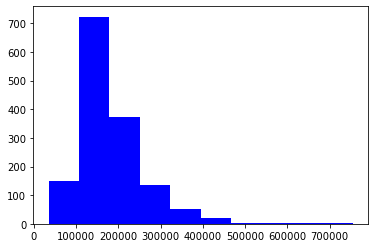

In [9]:
print ("Skew is:", X_full.SalePrice.skew())
plt.hist(X_full.SalePrice, color='blue')
plt.show()

In [10]:
imp_mean = SimpleImputer(strategy='most_frequent')
categorical_cols = X_test_full.select_dtypes(include='object').copy()
numerical_cols = X_test_full.select_dtypes(exclude='object').copy()
coll = categorical_cols.join(numerical_cols)
colll = coll.columns
ddddd = imp_mean.fit_transform(coll)
d = pd.DataFrame(ddddd,columns=colll)

In [11]:
numeric_features_d = d.select_dtypes(exclude='object')
# d = xx.corr(y)
# corr_d = numeric_features_d.corr()
# d= xx.corr(xx['SalePrice'])
# print (corr['SalePrice'].sort_values(ascending=False))
# plt.figure(figsize=(12,12))
# print(corr['SalePrice'][(corr['SalePrice'] > 0.5) | (corr['SalePrice'] < -0.5)])
# sns.heatmap(corr)


cat_feature_d = d.select_dtypes(include='object')
cat_col_d = cat_feature_d.columns
# corr_cat = cat_feature.corr()

ohee_d = LabelEncoder()
for i in cat_col_d:
    cat_feature_d[i] = ohee_d.fit_transform(cat_feature_d[i])
# cat_feature

data_d= numeric_features_d.join(cat_feature_d)



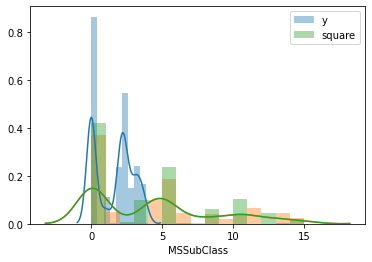

In [12]:
# data_d.skew().sort_values()
y=np.sqrt(data_d.MSSubClass)
# y=np.log(data_d.SalePrice)
# print ("Skew is:", y.skew())
# print(data_d.MSSubClass)
sns.distplot(y,label='y')
sns.distplot(data_d.MSSubClass)
sns.distplot(np.square(y),label="square")
plt.legend()

In [13]:
numeric_features_d

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

In [14]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1459 non-null   object
 1   Street         1459 non-null   object
 2   Alley          1459 non-null   object
 3   LotShape       1459 non-null   object
 4   LandContour    1459 non-null   object
 5   Utilities      1459 non-null   object
 6   LotConfig      1459 non-null   object
 7   LandSlope      1459 non-null   object
 8   Neighborhood   1459 non-null   object
 9   Condition1     1459 non-null   object
 10  Condition2     1459 non-null   object
 11  BldgType       1459 non-null   object
 12  HouseStyle     1459 non-null   object
 13  RoofStyle      1459 non-null   object
 14  RoofMatl       1459 non-null   object
 15  Exterior1st    1459 non-null   object
 16  Exterior2nd    1459 non-null   object
 17  MasVnrType     1459 non-null   object
 18  ExterQual      1459 non-null

In [15]:
# # Preprocessing for numerical data
# numerical_transformer = SimpleImputer(strategy='most_frequent') # Your code here

# # Preprocessing for categorical data
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
# ])
#  # Your code here

# # Bundle preprocessing for numerical and categorical data
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_cols),
#         ('cat', categorical_transformer, categorical_cols)
#     ])

# # Define model
# model = RandomForestRegressor(n_estimators=800, random_state=0) # Your code here

#### Remove the skewness of the target data

In [16]:
# X_full=X_full[X_full['SalePrice'] < 300000]

In [17]:
X_full.shape

(1460, 80)

In [18]:
numeric_features = X_full.select_dtypes(exclude='object')
# d = xx.corr(y)
corr = numeric_features.corr()
# d= xx.corr(xx['SalePrice'])
# print (corr['SalePrice'].sort_values(ascending=False))
plt.figure(figsize=(12,12))
print(corr['SalePrice'][(corr['SalePrice'] > 0.5) | (corr['SalePrice'] < -0.5)])
# sns.heatmap(corr)

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64


<Figure size 864x864 with 0 Axes>

In [19]:
cat_feature = X_full.select_dtypes(include='object')
cat_col = cat_feature.columns
# corr_cat = cat_feature.corr()

ohee = LabelEncoder()
for i in cat_col:
    cat_feature[i] = ohee.fit_transform(cat_feature[i])
cat_feature


C:\Users\johnpaul.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
Id                                                                           
1            3       1      1         3            3          0          4   
2            3       1      1         3            3          0          2   
3            3       1      1         0            3          0          4   
4            3       1      1         0            3          0          0   
5            3       1      1         0            3          0          2   
6            3       1      1         0            3          0          4   
7            3       1      1         3            3          0          4   
8            3       1      1         0            3          0          0   
9            4       1      1         3            3          0          4   
10           3       1      1         3            3          0          0   
11           3       1      1         3            3          0          4   
12           3       1      1         0            3          0          4   
13           3       1      1         1            3          0          4   
14           3       1      1         0            3          0          4   
15           3       1      1         0            3          0          0   
16           4       1      1         3            3          0          0   
17           3       1      1         0            3          0          1   
18           3       1      1         3            3          0          4   
19           3       1      1         3            3          0          4   
20           3       1      1         3            3          0          4   
21           3       1      1         0            3          0          0   
22           4       1      0         3            0          0          4   
23           3       1      1         3            3          0          4   
24           4       1      1         3            3          0          4   
25           3       1      1         0            3          0          4   
26           3       1      1         3            3          0          0   
27           3       1      1         3            3          0          0   
28           3       1      1         3            3          0          4   
29           3       1      1         0            3          0          1   
30           4       1      1         0            3          0          4   
31           0       1      2         3            3          0          4   
32           3       1      1         0            3          0          1   
33           3       1      1         3            3          0          0   
34           3       1      1         0            3          0          4   
35           3       1      1         3            3          0          4   
36           3       1      1         3            3          0          4   
37           3       1      1         3            3          0          0   
38           3       1      1         3            3          0          4   
39           3       1      1         3            3          0          4   
40           3       1      1         3            3          0          4   
41           3       1      1         3            3          0          4   
42           3       1      1         3            3          0          4   
43           3       1      1         0            3          0          1   
44           3       1      1         0            3          0          1   
45           3       1      1         3            3          0          4   
46           3       1      1         3            3          0          4   
47           3       1      1         0            3          0          1   
48           1       1      1         3            3          0          4   
49           4       1      1         3            3          0          4   
50           3       1      

In [20]:
data= numeric_features.join(cat_feature)

In [21]:
feature_col = data.columns.drop(['SalePrice'])
# trains, valids, tests = get_data_splits(new_data)

# Create the selector 
selector = SelectKBest(f_classif,k=15)

# Use the selector to retrieve the best features
X_new = selector.fit_transform(data[feature_col],data['SalePrice'])

X_new

array([[8.450e+03, 7.000e+00, 2.003e+03, ..., 2.000e+00, 2.000e+00,
        2.000e+00],
       [9.600e+03, 6.000e+00, 1.976e+03, ..., 3.000e+00, 2.000e+00,
        3.000e+00],
       [1.125e+04, 7.000e+00, 2.001e+03, ..., 2.000e+00, 2.000e+00,
        2.000e+00],
       ...,
       [9.042e+03, 7.000e+00, 1.941e+03, ..., 0.000e+00, 4.000e+00,
        2.000e+00],
       [9.717e+03, 5.000e+00, 1.950e+03, ..., 3.000e+00, 4.000e+00,
        2.000e+00],
       [9.937e+03, 5.000e+00, 1.965e+03, ..., 2.000e+00, 4.000e+00,
        3.000e+00]])

In [22]:
selected_features = pd.DataFrame(selector.inverse_transform(X_new), 
                                 index=data.index, 
                                 columns=feature_col)
selected_features.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                          
1          0.0          0.0   8450.0          7.0          0.0     2003.0   
2          0.0          0.0   9600.0          6.0          0.0     1976.0   
3          0.0          0.0  11250.0          7.0          0.0     2001.0   
4          0.0          0.0   9550.0          7.0          0.0     1915.0   
5          0.0          0.0  14260.0          8.0          0.0     2000.0   

    YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1            0.0       196.0         0.0         0.0        0.0        856.0   
2            0.0         0.0         0.0         0.0        0.0       1262.0   
3            0.0       162.0         0.0         0.0        0.0        920.0   
4            0.0         0.0         0.0         0.0        0.0        756.0   
5            0.0       350.0         0.0         0.0        0.0       1145.0   

    1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
Id                                                                            
1      856.0       0.0           0.0     1710.0           0.0           0.0   
2     1262.0       0.0           0.0     1262.0           0.0           0.0   
3      920.0       0.0           0.0     1786.0           0.0           0.0   
4      961.0       0.0           0.0     1717.0           0.0           0.0   
5     1145.0       0.0           0.0     2198.0           0.0           0.0   

    FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
Id                                                                             
1        2.0       0.0           0.0           0.0           8.0         0.0   
2        2.0       0.0           0.0           0.0           6.0         0.0   
3        2.0       0.0           0.0           0.0           6.0         0.0   
4        1.0       0.0           0.0           0.0           7.0         0.0   
5        2.0       0.0           0.0           0.0           9.0         0.0   

    GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
Id                                                                 
1           0.0         2.0       548.0         0.0          0.0   
2           0.0         2.0       460.0         0.0          0.0   
3           0.0         2.0       608.0         0.0          0.0   
4           0.0         3.0       642.0         0.0          0.0   
5           0.0         3.0       836.0         0.0          0.0   

    EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
Id                                                                             
1             0.0        0.0          0.0       0.0      0.0     0.0     0.0   
2             0.0        0.0          0.0       0.0      0.0     0.0     0.0   
3             0.0        0.0          0.0       0.0      0.0     0.0     0.0   
4             0.0        0.0          0.0       0.0      0.0     0.0     0.0   
5             0.0        0.0          0.0       0.0      0.0     0.0     0.0   

    MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
Id                                                                         
1        0.0     0.0    0.0       0.0          0.0        0.0        0.0   
2        0.0     0.0    0.0       0.0          0.0        0.0        0.0   
3        0.0     0.0    0.0       0.0          0.0        0.0        0.0   
4        0.0     0.0    0.0       0.0          0.0        0.0        0.0   
5        0.0     0.0    0.0       0.0          0.0        0.0        0.0   

    LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  \
Id                                                                          
1         0.0           0.0         0.0         0.0       0.0  

In [23]:
# Dropped columns have values of all 0s, so var is 0, drop them
selected_columns = selected_features.columns[selected_features.var() != 0]

# Get the valid dataset with the selected features.
data[selected_columns].head()

LotArea  OverallQual  YearBuilt  MasVnrArea  TotalBsmtSF  1stFlrSF  \
Id                                                                       
1      8450            7       2003       196.0          856       856   
2      9600            6       1976         0.0         1262      1262   
3     11250            7       2001       162.0          920       920   
4      9550            7       1915         0.0          756       961   
5     14260            8       2000       350.0         1145      1145   

    GrLivArea  FullBath  TotRmsAbvGrd  GarageCars  GarageArea  MiscVal  \
Id                                                                       
1        1710         2             8           2         548        0   
2        1262         2             6           2         460        0   
3        1786         2             6           2         608        0   
4        1717         1             7           3         642        0   
5        2198         2             9           3         836        0   

    ExterQual  BsmtQual  KitchenQual  
Id                                    
1           2         2            2  
2           3         2            3  
3           2         2            2  
4           3         4            2  
5           2         2            2

In [24]:
data.SalePrice

Id
1       208500
2       181500
3       223500
4       140000
5       250000
6       143000
7       307000
8       200000
9       129900
10      118000
11      129500
12      345000
13      144000
14      279500
15      157000
16      132000
17      149000
18       90000
19      159000
20      139000
21      325300
22      139400
23      230000
24      129900
25      154000
26      256300
27      134800
28      306000
29      207500
30       68500
31       40000
32      149350
33      179900
34      165500
35      277500
36      309000
37      145000
38      153000
39      109000
40       82000
41      160000
42      170000
43      144000
44      130250
45      141000
46      319900
47      239686
48      249700
49      113000
50      127000
51      177000
52      114500
53      110000
54      385000
55      130000
56      180500
57      172500
58      196500
59      438780
60      124900
61      158000
62      101000
63      202500
64      140000
65      219500
66      317000
67     

In [25]:
y=np.log(data.SalePrice)
data.drop('SalePrice',axis=1,inplace=True)


In [26]:
# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(data[selected_columns], y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [27]:
model = RandomForestRegressor(n_estimators=250, random_state=0)

In [28]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [29]:
X_train.shape

(1168, 15)

In [30]:
preds = model.predict(X_valid)

print('MAE:', mean_absolute_error(y_valid, preds))

MAE: 0.10491008981526237


In [31]:
X_train.shape

(1168, 15)

In [32]:
# feats = X_test_full.select_dtypes(
#         include=[np.number]).interpolate()

In [33]:
data_d[selected_columns]

LotArea  OverallQual  YearBuilt  MasVnrArea  TotalBsmtSF  1stFlrSF  \
0         777            4         56           0          202       177   
1         964            5         53          59          477       474   
2         947            4         92           0          234       200   
3         587            5         93           6          233       199   
4         118            7         87           0          455       447   
5         590            5         88           0          130        91   
6         313            5         87           0          390       391   
7         379            5         93           0          141       103   
8         615            6         85           0          465       482   
9         378            3         65           0          202       164   
10        146            6         94           0          521       480   
11         11            5         66         252           36         5   
12         11            4         66         247           45        12   
13         27            5         70           0          187       144   
14         27            6         70           0          173       133   
15        883            8        104          96          606       647   
16        887            7        104         159          583       600   
17        771            8        100         272          646       682   
18        953            7        100         149          680       719   
19        967            8         98         299          734       785   
20        939            7         97         144          635       676   
21        220            7        101         107          503       501   
22       1057            5        100           0          474       471   
23         53            6        101           3          376       362   
24        919            6         99           0           17        79   
25        400            6         99           0          180       139   
26       1041            7         93          62          624       654   
27        457            7        100         139          609       629   
28        485            6        104           0          422       414   
29        646            5        100           0          555       554   
30        812            6         99          68          169       128   
31        566            4         18           0          157       260   
32        999            5         69         154          415       568   
33        910            7         88         252          430       432   
34        738            7         87         109          513       520   
35        112            6         99           0          559       565   
36         60            6         99           0          175       135   
37         54            6         99          66           68        26   
38         37            6         99           0           68        26   
39         37            5        100         134           68        26   
40         43            5         95         301          128        86   
41         33            6         98           0           48        15   
42        882            7        105           0          627       528   
43        243            7         95           0          262       234   
44        316            6         97           0          562       567   
45        651            5         62          66          682       723   
46        692            5         88           0          455       447   
47       1060            5         73           0          426       452   
48        532            5         66           0          109       202   
49        532            4         61         103          431       423   
50        578            4         61           0          416       406   
51        548            4         62         167     

In [34]:
prediction = model.predict(data_d[selected_columns])

In [35]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_valid, preds))

RMSE is: 
 0.02264288743033893


In [36]:
final_predictions = np.exp(prediction)
final_predictions

array([66893.15858934, 76328.41197006, 65727.03968036, ...,
       67219.60221569, 60048.22625942, 80002.71880218])

In [37]:
X_train.shape

(1168, 15)

In [38]:
data_d.shape

(1459, 79)

In [39]:
# Save test predictions to file
output = pd.DataFrame({'Id': X_test_full.index,
                       'SalePrice': final_predictions})
output.to_csv('submission.csv', index=False)

In [40]:
ssss = pd.read_csv('submission.csv')
ssss

Id      SalePrice
0     1461   66893.158589
1     1462   76328.411970
2     1463   65727.039680
3     1464   76531.615603
4     1465  136658.239674
5     1466   75902.252717
6     1467   75469.427564
7     1468   75765.667865
8     1469   82427.369191
9     1470   59440.773422
10    1471   77301.903016
11    1472   74556.962537
12    1473   60310.871801
13    1474   76392.835713
14    1475   75070.794869
15    1476  194299.019644
16    1477  155115.754588
17    1478  194981.267763
18    1479  154505.263859
19    1480  201872.991941
20    1481  147970.515211
21    1482  136706.775691
22    1483   75502.891669
23    1484   76292.581834
24    1485   76325.930806
25    1486   76772.643839
26    1487  159975.453331
27    1488  156072.422025
28    1489   78480.905777
29    1490   78146.063447
30    1491   77146.448360
31    1492   61838.966374
32    1493   79307.863211
33    1494  146041.455921
34    1495  143777.772608
35    1496   79524.363444
36    1497   79128.275144
37    1498   76693.397716
38    1499   76648.010736
39    1500   75363.669410
40    1501   75064.146695
41    1502   76627.048051
42    1503  155858.116064
43    1504  134523.264599
44    1505   82551.178487
45    1506   79337.714739
46    1507   80434.571641
47    1508   76883.844000
48    1509   77022.950957
49    1510   66290.903435
50    1511   66096.920266
51    1512   68877.391745
52    1513   76902.632647
53    1514   61099.421668
54    1515   71704.111464
55    1516   76085.328118
56    1517   75348.697998
57    1518   71073.318634
58    1519   81793.389536
59    1520   60666.107162
60    1521   60500.946813
61    1522   80774.999210
62    1523   50812.820766
63    1524   60268.919619
64    1525   60615.078733
65    1526   60615.078733
66    1527   63595.334262
67    1528   74655.303163
68    1529   65243.003018
69    1530   80291.016178
70    1531   50841.242997
71    1532   59671.031697
72    1533   70832.929181
73    1534   75548.708774
74    1535   61439.105605
75    1536   60696.626552
76    1537   61531.335878
77    1538  134528.328450
78    1539  134046.826734
79    1540   59552.728147
80    1541   76183.155064
81    1542   61638.314082
82    1543   75808.118309
83    1544   51428.609675
84    1545   74685.837638
85    1546   77273.618121
86    1547   61246.763120
87    1548   74729.725968
88    1549   68599.205577
89    1550   65500.959439
90    1551   74792.299957
91    1552   61556.309039
92    1553   72557.721245
93    1554   74786.315395
94    1555   65733.552389
95    1556   60884.840464
96    1557   57395.328786
97    1558   74700.289117
98    1559   49818.525580
99    1560   65683.199157
100   1561   52868.313405
101   1562   62212.885819
102   1563   60482.558098
103   1564   70065.764872
104   1565   66239.757945
105   1566   81607.527741
106   1567   59171.830261
107   1568   77446.875410
108   1569   52292.377642
109   1570   76364.695974
110   1571   50927.797228
111   1572   60696.895775
112   1573   82718.546745
113   1574   64853.896984
114   1575   81705.949834
115   1576   79758.540901
116   1577   77631.901807
117   1578   75685.940980
118   1579   67875.088511
119   1580   78151.494902
120   1581   59034.201581
121   1582   66085.979292
122   1583  157590.518672
123   1584   79214.540370
124   1585   76312.711481
125   1586   50012.128015
126   1587   60886.260539
127   1588   61747.356737
128   1589   59046.906034
129   1590   75424.316207
130   1591   50104.176321
131   1592   59783.430808
132   1593   76791.235417
133   1594   50552.377161
134   1595   60025.270304
135   1596   73508.122765
136   1597   66403.364109
137   1598   77987.493738
138   1599  133119.615940
139   1600  136658.239674
140   1601   49542.431950
141   1602   76694.174894
142   1603   48870.252120
143   1604  140040.708890
144   1605  144528.843632
145   1606   76192.655534
146   1607   80615.479810
147   1608   81697.924909
148   1609   77089.568766
149   1610   65268.096799
150   1611   66368.133320
151   1612   70828.579178
152   1613   70804.180682
153 

In [41]:
X_test_full.index

Int64Index([1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470,
            ...
            2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919],
           dtype='int64', name='Id', length=1459)